In [1]:
### Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### download the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data")

In [3]:
### displaying the head
df.head()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


In [4]:
## numbering columns
df.columns = [i for i in range(len(df.columns))]

In [5]:
### display head
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


***There are 279 columns in the dataframe, the target column is #279. We will try to do PCA***

In [6]:
###df.describe
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.000000,451.000000
mean,46.407982,0.552106,166.135255,68.144124,88.915743,155.068736,367.199557,169.940133,89.935698,33.787140,...,-0.279601,9.048115,-1.458537,0.003991,0.0,0.513969,1.218625,19.317295,29.429047,3.871397
std,16.429846,0.497830,37.194646,16.599841,15.381143,44.856534,33.422017,35.672130,25.813912,45.421423,...,0.549328,3.476718,2.004481,0.050173,0.0,0.347441,1.425438,13.517617,18.490566,4.407706
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,4.000000,...,-0.450000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.400000,17.500000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,78.500000,94.000000,174.500000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.850000,41.050000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [7]:
### Checking for missing values
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 280, dtype: int64

<AxesSubplot:>

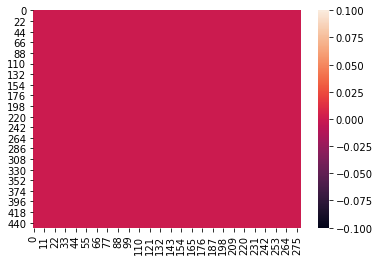

In [8]:
sns.heatmap(df.isnull()) ## No missing values

In [9]:
## Value counts of target class
df[279].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       1
Name: 279, dtype: int64

In [10]:
objects = [col for col in range(len(df.columns)) if df[col].dtypes=="O"]

In [11]:
objects ### columns 10,11,12,13,14 are object type

[10, 11, 12, 13, 14]

In [12]:
for i in objects:
    df[i] = df[i].replace("?",0)

In [13]:
for i in objects:
    df[i] = df[i].astype("float") 

In [14]:
for i in objects:
    df[i] = df[i].replace(0,df[i].mean())

In [15]:
###There are total 16 classes

***Let us try to extract 50 components first using PCA***

In [16]:
## Feature Vector
X = df.drop(279,axis=1).values
### Target Vector
y = df[279].values

In [17]:
X.shape

(451, 279)

In [18]:
y.shape

(451,)

In [19]:
### train test split

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
### scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
## PCA = 50

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)

In [69]:
principal_componens_50 = pca.fit_transform(X_train_scaled)

In [70]:
explained_variance_50 = np.mean(pca.explained_variance_)

In [71]:
explained_variance_50

4.206640587287831

In [72]:
## loop to test ideal n_components

In [73]:
n_components_ = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
exp_var=[]
for i in range(len(n_components_)):
    pca = PCA(n_components=n_components_[i])
    principal_components = pca.fit_transform(X_train_scaled)
    mean_exp_variance = np.mean(pca.explained_variance_)
    exp_var.append(mean_exp_variance)

In [74]:
exp_var

[11.118850711941402,
 7.577168914957069,
 5.940075885808834,
 4.916208391365875,
 4.206640587287831,
 3.6826654304855313,
 3.27360017999308,
 2.9397058634402966,
 2.662229407889537,
 2.42829158893623,
 2.2291017763302348,
 2.0576062279954757,
 1.9088479666406306,
 1.778950628985241,
 1.6644537674291733]

In [75]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled) ##100 PCA Components

In [76]:
from tensorflow.keras.utils import to_categorical

In [77]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test) ## One hot encoding

In [78]:
## model


In [125]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ## Tensorflow imports


In [90]:
model = Sequential()
model.add(Dense(100,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(50,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(17,activation="softmax"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"]) ###First Model

In [91]:
model.fit(X_train_pca,y_train_cat,validation_data=(X_test_pca,y_test_cat),epochs=25)

Train on 302 samples, validate on 149 samples
Epoch 1/25
302/302 [==============================] - 0s 1ms/sample - loss: 0.3445 - accuracy: 0.9270 - val_loss: 0.2767 - val_accuracy: 0.9356
Epoch 2/25
302/302 [==============================] - 0s 165us/sample - loss: 0.2386 - accuracy: 0.9375 - val_loss: 0.2269 - val_accuracy: 0.9368
Epoch 3/25
302/302 [==============================] - 0s 168us/sample - loss: 0.1781 - accuracy: 0.9425 - val_loss: 0.1931 - val_accuracy: 0.9400
Epoch 4/25
302/302 [==============================] - 0s 134us/sample - loss: 0.1472 - accuracy: 0.9490 - val_loss: 0.1823 - val_accuracy: 0.9416
Epoch 5/25
302/302 [==============================] - 0s 168us/sample - loss: 0.1250 - accuracy: 0.9568 - val_loss: 0.1717 - val_accuracy: 0.9416
Epoch 6/25
302/302 [==============================] - 0s 142us/sample - loss: 0.1069 - accuracy: 0.9624 - val_loss: 0.1607 - val_accuracy: 0.9455
Epoch 7/25
302/302 [==============================] - 0s 165us/sample - loss: 0.

In [93]:
p=model.predict_classes(X_test_pca)

In [101]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [98]:
print(confusion_matrix(p,y_test))

[[70  3  1  2  3  5  1  1  0  8  2  1  3]
 [ 7  4  1  0  0  0  0  0  2  2  0  1  1]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  4  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0]]


In [100]:
print(classification_report(p,y_test))

              precision    recall  f1-score   support

           1       0.86      0.70      0.77       100
           2       0.50      0.22      0.31        18
           3       0.67      1.00      0.80         4
           4       0.67      0.67      0.67         6
           5       0.20      0.50      0.29         2
           6       0.17      0.33      0.22         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.33      1.00      0.50         1
          10       0.48      0.92      0.63        12
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2

    accuracy                           0.64       149
   macro avg       0.30      0.41      0.32       149
weighted avg       0.73      0.64      0.67       149



In [104]:
accuracy_score(p,y_test) ## Accuracy

0.6442953020134228

In [106]:
model2 = Sequential()
model2.add(Dense(100,activation="relu"))
model2.add(Dense(100,activation="sigmoid"))
model2.add(Dense(17,activation="softmax"))

model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"]) ## Second model

In [107]:
model2.fit(X_train_pca,y_train_cat,validation_data=(X_test_pca,y_test_cat),epochs=25)

Train on 302 samples, validate on 149 samples
Epoch 1/25
302/302 [==============================] - 0s 2ms/sample - loss: 0.2397 - accuracy: 0.9412 - val_loss: 0.2063 - val_accuracy: 0.9412
Epoch 2/25
302/302 [==============================] - 0s 145us/sample - loss: 0.1806 - accuracy: 0.9412 - val_loss: 0.1641 - val_accuracy: 0.9392
Epoch 3/25
302/302 [==============================] - 0s 188us/sample - loss: 0.1486 - accuracy: 0.9422 - val_loss: 0.1487 - val_accuracy: 0.9432
Epoch 4/25
302/302 [==============================] - 0s 161us/sample - loss: 0.1356 - accuracy: 0.9451 - val_loss: 0.1419 - val_accuracy: 0.9467
Epoch 5/25
302/302 [==============================] - 0s 172us/sample - loss: 0.1241 - accuracy: 0.9548 - val_loss: 0.1370 - val_accuracy: 0.9479
Epoch 6/25
302/302 [==============================] - 0s 167us/sample - loss: 0.1155 - accuracy: 0.9583 - val_loss: 0.1332 - val_accuracy: 0.9510
Epoch 7/25
302/302 [==============================] - 0s 145us/sample - loss: 0.

In [111]:
model2.evaluate(X_test_pca,y_test_cat)

149/149 [==============================] - 0s 187us/sample - loss: 0.1112 - accuracy: 0.9621


[0.1112349193868221, 0.96210027]

In [110]:
model3 = Sequential()
model3.add(Dense(150,activation="sigmoid",kernel_initializer="glorot_normal"))
model3.add(Dense(100,activation="sigmoid",kernel_initializer="glorot_normal"))
model3.add(Dense(17,activation="softmax"))

model3.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"]) ###Third Model

In [112]:
model3.fit(X_train_pca,y_train_cat,validation_data=(X_test_pca,y_test_cat),epochs=25)

Train on 302 samples, validate on 149 samples
Epoch 1/25
302/302 [==============================] - 0s 1ms/sample - loss: 0.1857 - accuracy: 0.9412 - val_loss: 0.1547 - val_accuracy: 0.9483
Epoch 2/25
302/302 [==============================] - 0s 145us/sample - loss: 0.1475 - accuracy: 0.9496 - val_loss: 0.1489 - val_accuracy: 0.9463
Epoch 3/25
302/302 [==============================] - 0s 159us/sample - loss: 0.1401 - accuracy: 0.9486 - val_loss: 0.1447 - val_accuracy: 0.9574
Epoch 4/25
302/302 [==============================] - 0s 172us/sample - loss: 0.1350 - accuracy: 0.9618 - val_loss: 0.1421 - val_accuracy: 0.9582
Epoch 5/25
302/302 [==============================] - 0s 158us/sample - loss: 0.1309 - accuracy: 0.9618 - val_loss: 0.1393 - val_accuracy: 0.9574
Epoch 6/25
302/302 [==============================] - 0s 172us/sample - loss: 0.1269 - accuracy: 0.9624 - val_loss: 0.1366 - val_accuracy: 0.9570
Epoch 7/25
302/302 [==============================] - 0s 172us/sample - loss: 0.

In [113]:
model3.evaluate(X_test_pca,y_test_cat)

149/149 [==============================] - 0s 100us/sample - loss: 0.1143 - accuracy: 0.9589


[0.11432553982774683, 0.958942]

In [114]:
model4 = Sequential()
model4.add(Dense(150,activation="sigmoid",kernel_initializer="glorot_normal"))
model4.add(Dense(100,activation="sigmoid",kernel_initializer="glorot_normal"))
model4.add(Dense(50,activation="sigmoid",kernel_initializer="glorot_normal"))

model4.add(Dense(17,activation="softmax"))

model4.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"]) ##Fourth model

In [115]:
model4.fit(X_train_pca,y_train_cat,validation_data=(X_test_pca,y_test_cat),epochs=25)

Train on 302 samples, validate on 149 samples
Epoch 1/25
302/302 [==============================] - 0s 1ms/sample - loss: 0.2429 - accuracy: 0.9412 - val_loss: 0.2170 - val_accuracy: 0.9412
Epoch 2/25
302/302 [==============================] - 0s 155us/sample - loss: 0.1998 - accuracy: 0.9412 - val_loss: 0.1839 - val_accuracy: 0.9412
Epoch 3/25
302/302 [==============================] - 0s 168us/sample - loss: 0.1730 - accuracy: 0.9412 - val_loss: 0.1650 - val_accuracy: 0.9412
Epoch 4/25
302/302 [==============================] - 0s 188us/sample - loss: 0.1581 - accuracy: 0.9412 - val_loss: 0.1562 - val_accuracy: 0.9412
Epoch 5/25
302/302 [==============================] - 0s 182us/sample - loss: 0.1510 - accuracy: 0.9412 - val_loss: 0.1528 - val_accuracy: 0.9412
Epoch 6/25
302/302 [==============================] - 0s 181us/sample - loss: 0.1480 - accuracy: 0.9474 - val_loss: 0.1511 - val_accuracy: 0.9463
Epoch 7/25
302/302 [==============================] - 0s 182us/sample - loss: 0.

In [116]:
model4.evaluate(X_test_pca,y_test_cat) 

149/149 [==============================] - 0s 100us/sample - loss: 0.1286 - accuracy: 0.9554


[0.1286411958952878, 0.95538884]

In [119]:
losses = pd.DataFrame(model.history.history) ##Track of Loss

In [120]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.344543,0.926958,0.276719,0.935650
1,0.238578,0.937476,0.226880,0.936834
2,0.178139,0.942540,0.193129,0.939992
3,0.147223,0.948968,0.182273,0.941571
4,0.125015,0.956759,0.171674,0.941571
5,0.106914,0.962407,0.160657,0.945519
6,0.093885,0.965719,0.153709,0.949072
7,0.083081,0.969809,0.148022,0.952231
8,0.073875,0.972147,0.144623,0.952625
9,0.065758,0.976042,0.141138,0.952625


<AxesSubplot:>

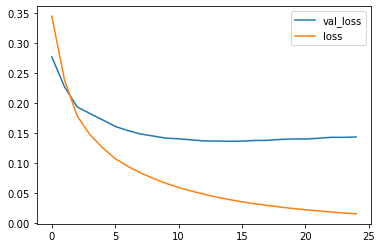

In [121]:
losses[["val_loss","loss"]].plot() ### Overfitting

In [145]:
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

In [150]:
model5 = Sequential()
model5.add(Dense(100,kernel_initializer="glorot_normal",kernel_regularizer=tf.keras.regularizers.L1L2(0.01)))
model5.add(LeakyReLU(alpha=0.03))
model5.add(Dropout(0.4))

model5.add(Dense(100,kernel_initializer="glorot_normal",kernel_regularizer=tf.keras.regularizers.L1L2(0.01)))
model5.add(LeakyReLU(alpha=0.08))

model5.add(Dropout(0.4))


model5.add(Dense(17,activation="softmax"))
 
model5.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"]) #Fifth model

In [151]:
model5.fit(X_train_pca,y_train_cat,validation_data=(X_test_pca,y_test_cat),epochs=25) 

Train on 302 samples, validate on 149 samples
Epoch 1/25
302/302 [==============================] - 0s 1ms/sample - loss: 15.9927 - accuracy: 0.9347 - val_loss: 14.9011 - val_accuracy: 0.9388
Epoch 2/25
302/302 [==============================] - 0s 165us/sample - loss: 14.1640 - accuracy: 0.9357 - val_loss: 13.1604 - val_accuracy: 0.9400
Epoch 3/25
302/302 [==============================] - 0s 187us/sample - loss: 12.4711 - accuracy: 0.9390 - val_loss: 11.5580 - val_accuracy: 0.9392
Epoch 4/25
302/302 [==============================] - 0s 192us/sample - loss: 10.9201 - accuracy: 0.9390 - val_loss: 10.0862 - val_accuracy: 0.9396
Epoch 5/25
302/302 [==============================] - 0s 162us/sample - loss: 9.4998 - accuracy: 0.9388 - val_loss: 8.7456 - val_accuracy: 0.9404
Epoch 6/25
302/302 [==============================] - 0s 182us/sample - loss: 8.2093 - accuracy: 0.9406 - val_loss: 7.5286 - val_accuracy: 0.9404
Epoch 7/25
302/302 [==============================] - 0s 168us/sample - 

<AxesSubplot:>

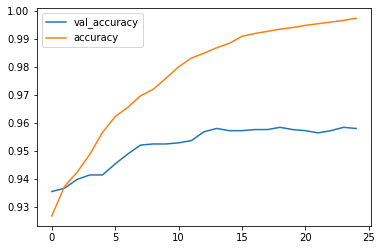

In [152]:
losses = pd.DataFrame(model.history.history)
losses[["val_accuracy","accuracy"]].plot() ### Overfitting

In [153]:
model5.evaluate(X_test_pca,y_test_cat) 

149/149 [==============================] - 0s 100us/sample - loss: 0.1755 - accuracy: 0.9463


[0.17545041971958725, 0.94630873]

In [ ]:
### 94.63% on test set